## Nobel Prizes - 1901-2016 - Data Analysis 

### Section 1
Loading libraries and reading in the Nobel Prize data

In [1]:
# Loading in libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np

# Reading in the Nobel Prize data
nobel = pd.read_csv("nobel.csv")


### Section 2
Displaying the total number of Nobel Prizes handed since 1901 to 2016. Next showcasing the number of prizes won grouped by gender.

In [2]:
# Display the number of Nobel Prizes handed out between 1901 and 2016
display(len(nobel))


# Display the number of prizes won by male and female recipients.
display(nobel["sex"].value_counts())



911

sex
Male      836
Female     49
Name: count, dtype: int64

### Section 3
Top 10 nationalities with the highest number of awardees

In [3]:
# Display the number of prizes won by the top 10 nationalities.
nobel["birth_country"].value_counts().head(10)

birth_country
United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: count, dtype: int64

### Section 4
Presenting the distribution of Novel Laureates by country over time

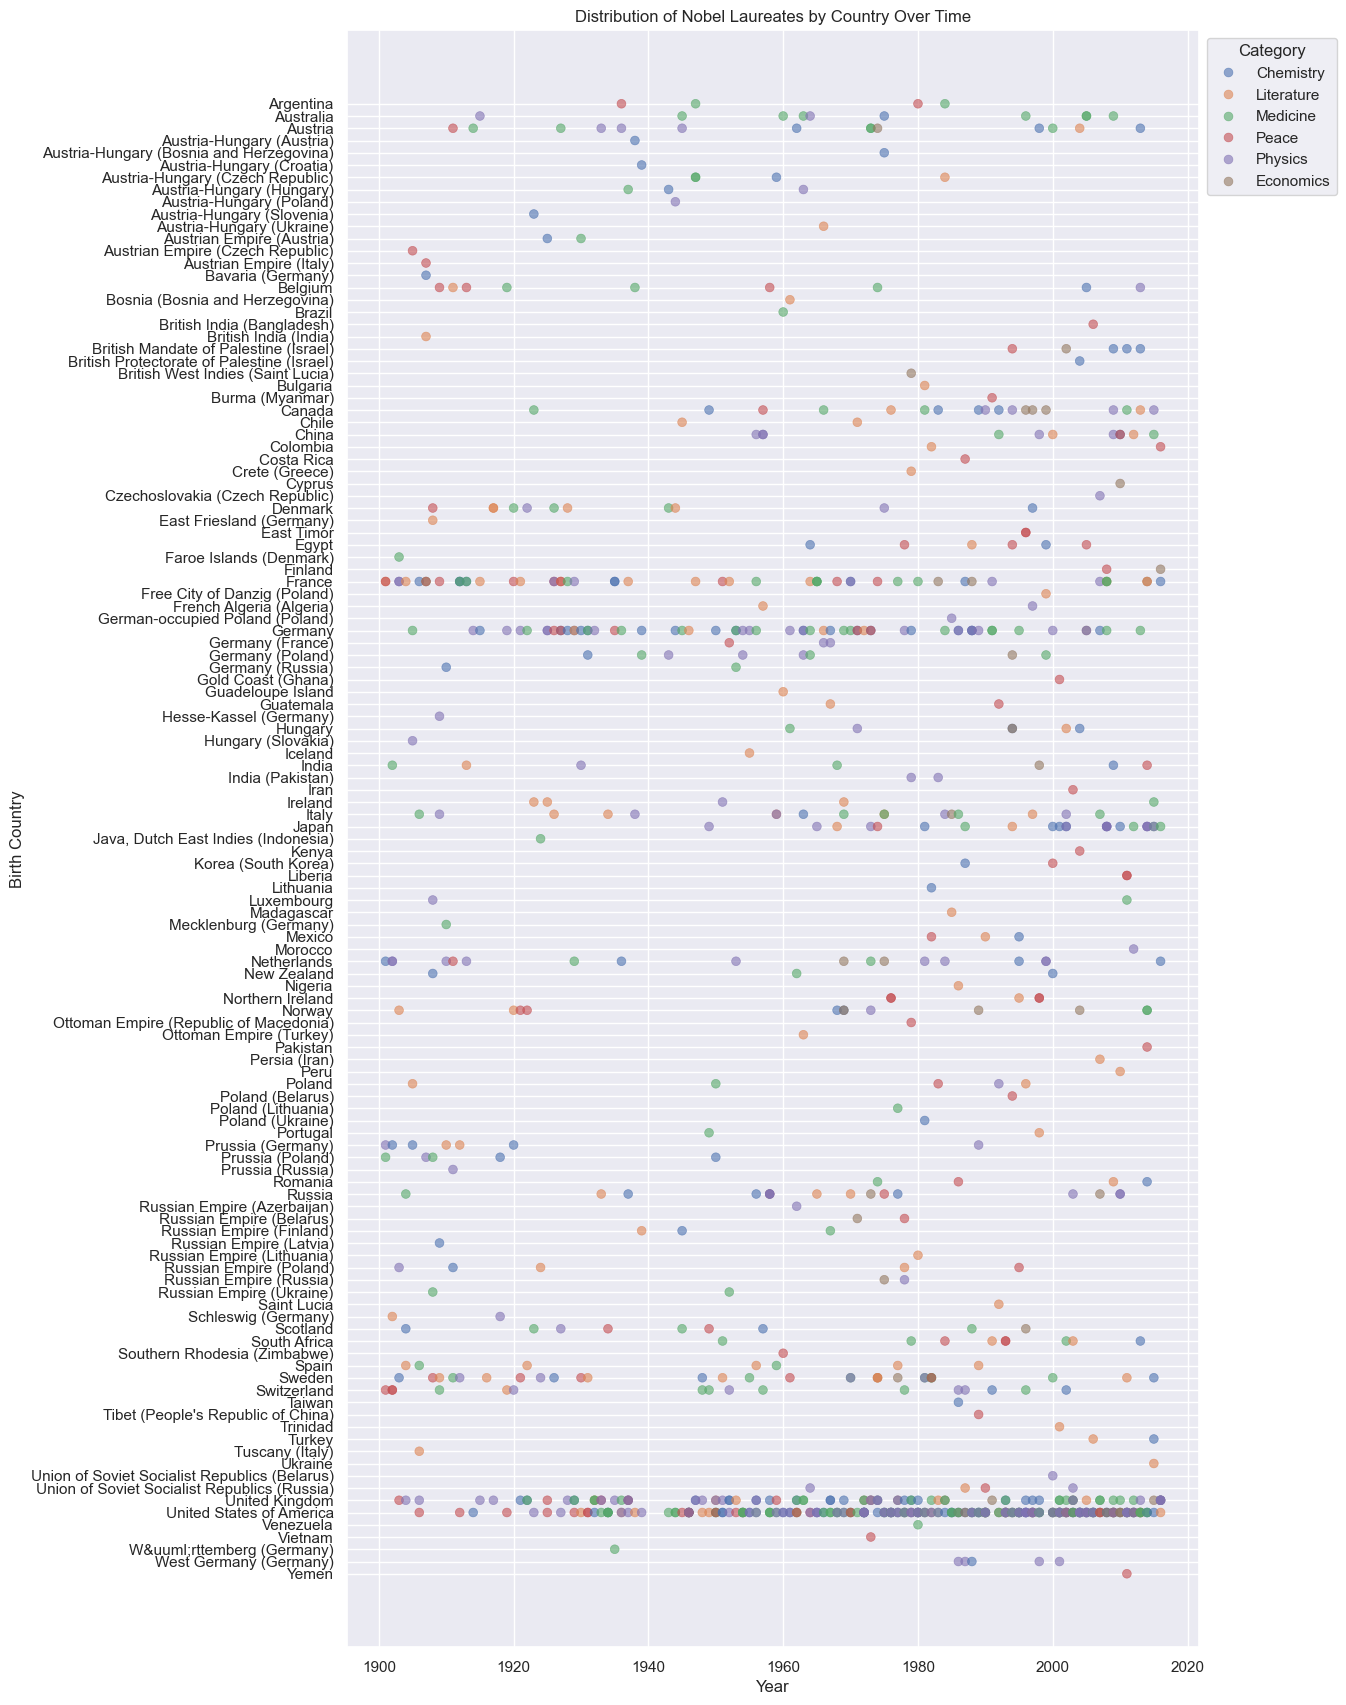

In [4]:
# Setting the plotting theme
sns.set()
# and the size of the plot.
plt.rcParams['figure.figsize'] = [11, 21]

# Get the list of unique birth countries in alphabetical order
nobel_ordered = nobel.copy()
nobel_ordered['birth_country'] = pd.Categorical(nobel_ordered['birth_country'], categories=sorted(nobel['birth_country'].dropna().unique()), ordered=True)


sns.scatterplot(data=nobel_ordered, x='year', y='birth_country', hue='category', alpha=0.6, s=40, edgecolor=None)
plt.title("Distribution of Nobel Laureates by Country Over Time")
plt.xlabel("Year")
plt.ylabel("Birth Country")
plt.legend(title="Category", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

### Section 5
More detailed analysis of the country 'producing' the most prize-winning individuals - USA.


In [5]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel["birth_country"]=='United States of America'
nobel['decade'] = (np.floor(nobel["year"]/10)*10).astype(int)
prop_usa_winners = nobel.groupby("decade", as_index=False)["usa_born_winner"].mean()

# Display the proportions of USA born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


### Section 6
The table above plotted and converted to percents


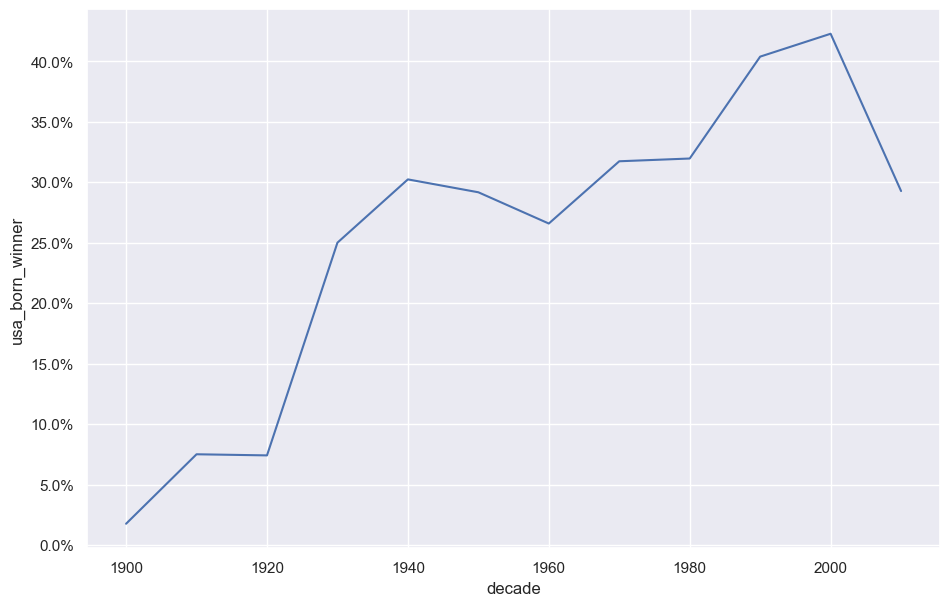

In [6]:
# setting the size for the rest of the plot
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(data=prop_usa_winners, x='decade', y='usa_born_winner')

# Adding %-formatting to the y-axis
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

### Section 7
Finding a breakthrough moment in the Nobel Prize history where the percentage of female winners started to increase. What were the categories they excelled at most?


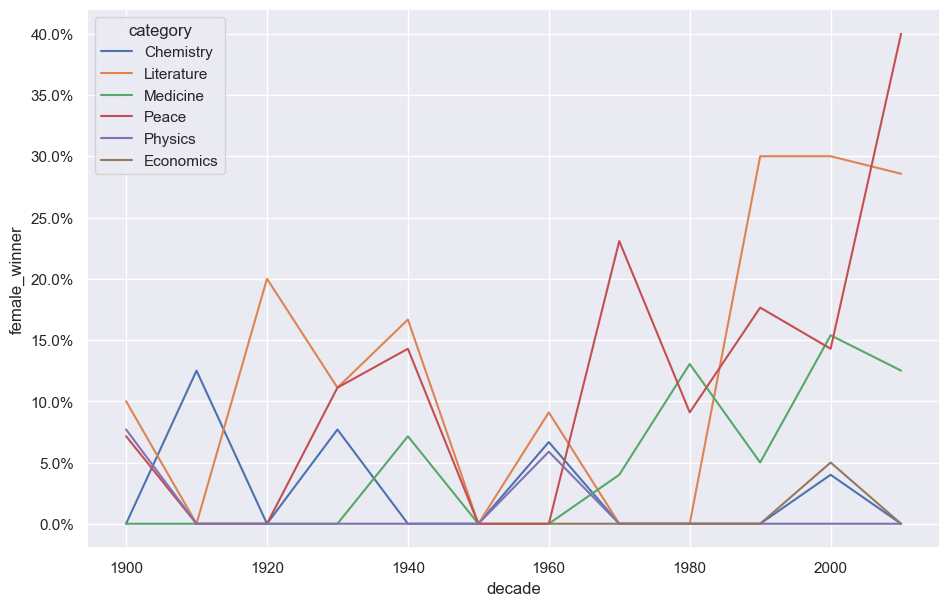

In [7]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel["sex"]=="Female"
prop_female_winners = nobel.groupby(["decade", "category"], as_index=False)["female_winner"].mean()

# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(data=prop_female_winners, x='decade', y='female_winner', hue="category")
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

### Section 8
The first ever woman to win the Noble Prize

In [8]:
# Picking out the first woman to win a Nobel Prize
nobel[nobel["sex"]=="Female"].nsmallest(1, "year")

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


### Section 9
Searching for awardees that were honoured more than once.

In [9]:
# Selecting the laureates that have received 2 or more prizes.
nobel.groupby("full_name").filter(lambda group: len(group)>1).sort_values("full_name")

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1980,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1970,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


### Section 10
A scatter plot of the age of every Noble Prize winner

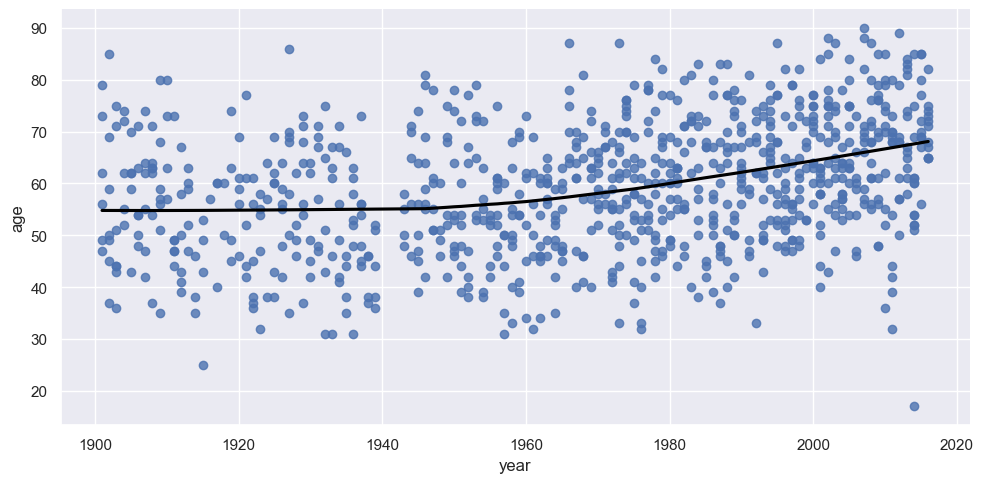

In [10]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year']-nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(data=nobel, x='year', y='age',  lowess=True, aspect=2, line_kws={'color': 'black'})

### Section 11
A scatter plot of the age of every Noble Prize winner - by each category

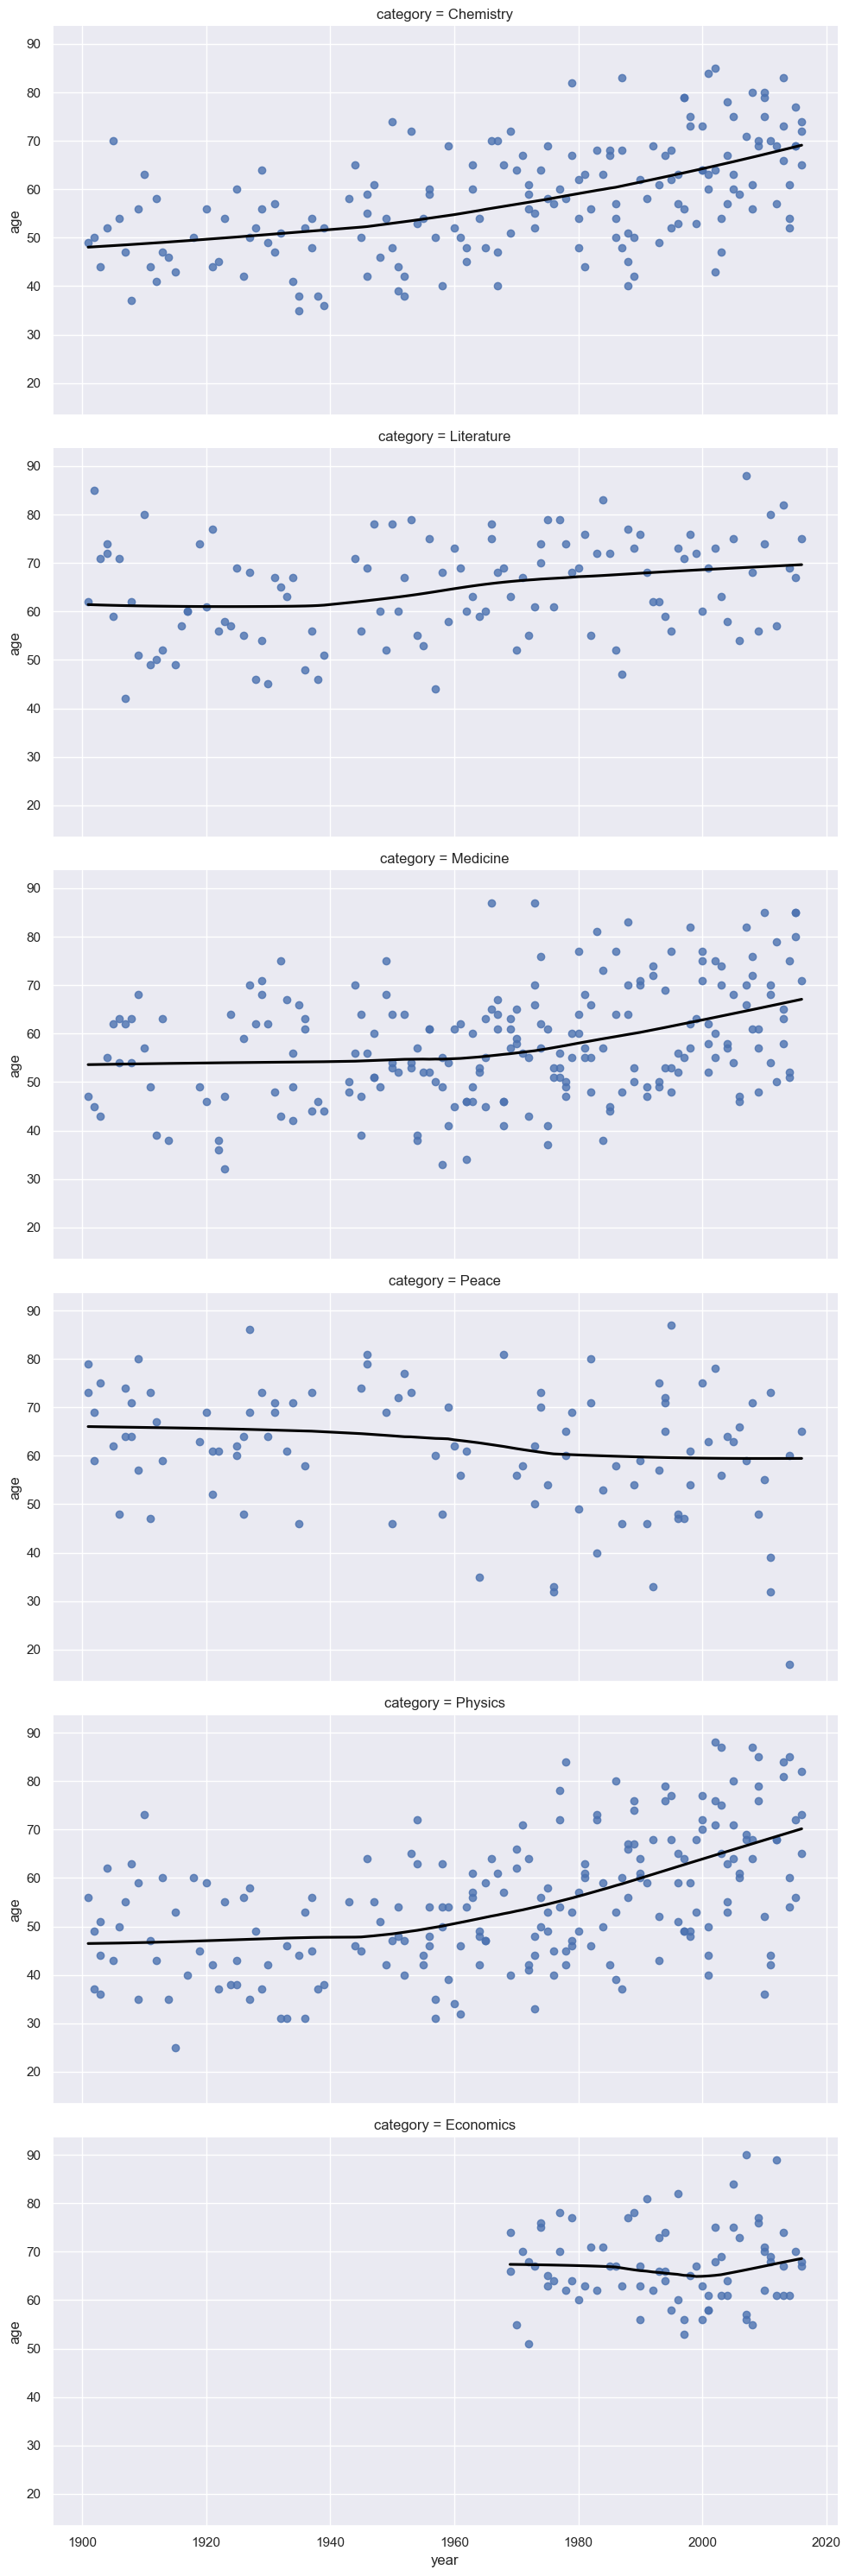

In [11]:
# Separate plots for each type of Nobel Prize - viewed in rows
sns.lmplot(data=nobel, x='year', y='age',  lowess=True, aspect=2, line_kws={'color': 'black'}, row="category")

### Section 12
Oldest and youngest award-winners

In [12]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, "age"))

# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1, "age")

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0
